In [9]:
# EE364b Convex Optimization II Homework 1. Spring 2022
# Distributed Subgradient Calculation using Dask
from time import time

import dask
import matplotlib.pyplot as plt
import numpy as np
def inprod(x, y):
    return np.dot(x,y)
n, m = 10000000, 4
trials_count = 10

#generate a1, ..., am in Rn randomly
def generate_data(m, n):

    data = np.random.randn(m,n)
    x= np.random.randn(n)
    return data, x
def compute_subgradient(data, x):
    output = []

    for i in range(data.shape[0]):
        output.append(inprod(data[i,:],x))
    index = np.argmax(output)




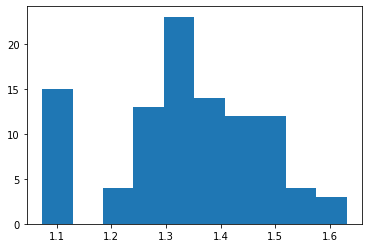

In [13]:
timings = []
for i in range(trials_count):

    start = time()
    data, x = generate_data(m,n)
    compute_subgradient(data, x)
    end = time()
    timings.append(end-start)

# generate x in Rn 
plt.hist(timings, bins=10)
plt.show()

In [21]:
def compute_subgradient_dask(data, x, visualize=False):
    output = []

    for i in range(data.shape[0]):
        res = dask.delayed(inprod)(data[i,:],x)
        output.append(res)
    index = dask.delayed(np.argmax)(output)
    if visualize:
        
        index.visualize()


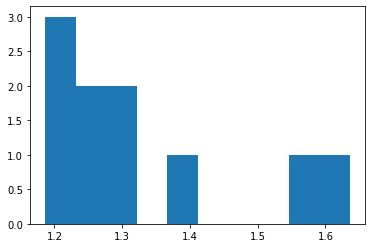

In [22]:
timings = []
for i in range(trials_count):

    start = time()
    data, x = generate_data(m,n)
    #data = dask.delayed(np.random.randn)(m,n)
    #x= dask.delayed(np.random.randn)(n)
    compute_subgradient_dask(data, x, True)
    end = time()
    timings.append(end-start)

# generate x in Rn 
plt.hist(timings, bins=10)
plt.show()


In [15]:
import numpy as np
def compute_subgradient_numpy(data, x):
    output = np.zeros((data.shape[0]))
    output = np.matmul(data, x)
    index = np.argmax(output)

In [ ]:
timings = []
data, x = generate_data(n=5, m=4)

dask.delayed(compute_subgradient)(data, x)
